In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [17]:
df = pd.read_csv('orig_summary.csv', parse_dates=["year"])

In [18]:
df.head()

,year,loanCount,totalOrigUPB,avgOrigUPB,avgCreditScore,avgOrigInterestRate,avgOrigCombinedLoantovalue,avgOrigLoantovalue,avgOrigDebttoincome
0,2005-01-01,50000,8532579000,170651.58,723.81614,5.806122,71.10286,69.45478,36.31602
1,2006-01-01,50000,8979629000,179592.58,722.38978,6.406876,73.11254,70.69534,37.27748
2,2007-01-01,50000,9188208000,183764.16,722.83612,6.376952,74.50202,72.06652,37.62848
3,2008-01-01,50000,10199093000,203981.86,740.74412,6.057020,71.50462,70.28216,36.93400
4,2009-01-01,50000,10685987000,213719.74,762.14216,4.958583,66.85308,65.44966,31.92590


### Origination Summary Plots

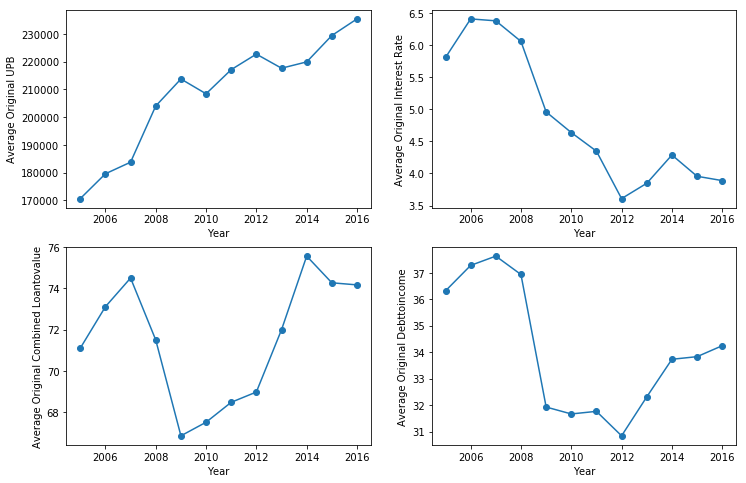

In [19]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(df['year'], df['avgOrigUPB'], marker='o', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Original UPB')

ax2 = fig.add_subplot(222)
ax2.plot(df['year'], df['avgOrigInterestRate'], marker='o', linestyle='-')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Original Interest Rate')

ax3 = fig.add_subplot(223)
ax3.plot(df['year'], df['avgOrigCombinedLoantovalue'], marker='o', linestyle='-')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Original Combined Loantovalue')

ax4 = fig.add_subplot(224)
ax4.plot(df['year'], df['avgOrigDebttoincome'], marker='o', linestyle='-')
ax4.set_xlabel('Year')
ax4.set_ylabel('Average Original Debttoincome')

Original UPB increases by the year. Original interest rate basically decreases by the year. Original combined loan to value and debt to income both descended around the economy recession at 2007, 2008, and both ascended around the economic boom in 2013.

In [20]:
import seaborn as sns

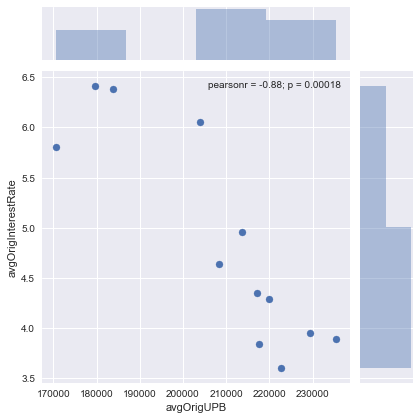

In [21]:
sns.jointplot(x='avgOrigUPB', y='avgOrigInterestRate', data=df)

Basically UPB is negatively related to interest rate.

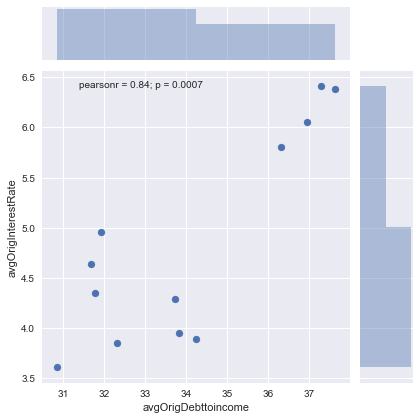

In [23]:
sns.jointplot(x='avgOrigDebttoincome', y='avgOrigInterestRate', data=df)

Basically there is a positive correlation between debt to income and interest rate.

### Origination State Summary Plots

In [3]:
state_df = pd.read_csv('orig_summary_state.csv')
# state_df = pd.read_csv('orig_summary_state.csv', parse_dates=["year"])

In [4]:
state_df.head()

,year,state,loanCount,totalOrigUPB,avgOrigUPB,avgCreditScore,avgOrigInterestRate,avgOrigCombinedLoantovalue,avgOrigLoantovalue,avgOrigDebttoincome
0,2005,WA,1521,284368000,186961.209730,728.862590,5.776599,71.314924,69.747535,36.343853
1,2005,MD,1431,296410000,207134.870720,716.980433,5.814560,67.722572,66.244584,36.301188
2,2005,NY,1887,377210000,199899.311076,723.402226,5.782834,68.074192,66.645999,36.101219
3,2005,DE,218,41322000,189550.458716,717.747706,5.821193,71.958716,70.082569,36.018349
4,2005,TX,2243,329315000,146818.992421,719.980829,5.781152,79.363798,76.515827,35.519394


In [1]:
import plotly
plotly.tools.set_credentials_file(username = 'liujiahua2014', api_key = 'c5QSIWnrF9HmSEoPnwMY')

In [22]:
def plotStateMap(df, col):

    data = [dict(type='choropleth',
                 locations = df['state'],
                 locationmode = 'USA-states',
                 z = df[col],
                 text = df['state'],
                 colorbar = {'title': 'avgOrigUPB'},
                 colorscale = 'Viridis',
                 reversescale = True)]

    layout = dict(title = col,
                  geo = dict(showframe=False, scope='usa',
                             projection=dict(type = 'albers usa')))

    figure = dict(data = data, layout = layout)
    return figure

In [7]:
state_year_df = state_df[state_df['year'] == 2015]

In [18]:
state_full_df = state_df.groupby('state').mean().reset_index()

##### 2015 Average Original UPB Map

In [23]:
fig = plotStateMap(state_year_df, 'avgOrigUPB')
plotly.plotly.iplot(fig)

#### Average Original UPB for all years

In [24]:
fig = plotStateMap(state_full_df, 'avgOrigUPB')
plotly.plotly.iplot(fig)

East and west coast has higher UPB values than the rest, implying abundant capital

#### 2015 Loan Count Map

In [25]:
fig = plotStateMap(state_year_df, 'loanCount')
plotly.plotly.iplot(fig)

#### Loan Count for all years

In [26]:
fig = plotStateMap(state_full_df, 'loanCount')
plotly.plotly.iplot(fig)

CA, TX and FL have higher loan counts, probably indicating good financial status and people's progressive minds.

#### 2015 Interest Rate

In [27]:
fig = plotStateMap(state_year_df, 'avgOrigInterestRate')
plotly.plotly.iplot(fig)

#### Interest Rate for all years

In [28]:
fig = plotStateMap(state_full_df, 'avgOrigInterestRate')
plotly.plotly.iplot(fig)

NV, FL shows high UPB values.

### Performance Summary Plots

In [27]:
perf_df = pd.read_csv('perf_summary.csv', parse_dates=["year"])

In [28]:
perf_df.head(20)

,year,nonDelinquencyRatio,avgCurrInterestRate
0,2005-01-01,0.950899,5.775855
1,2006-01-01,0.923818,6.345243
2,2007-01-01,0.909595,6.292827
3,2008-01-01,0.938412,6.008554
4,2009-01-01,0.989150,4.957200
5,2010-01-01,0.992513,4.636704
6,2011-01-01,0.994054,4.347383
7,2012-01-01,0.996997,3.609068
8,2013-01-01,0.996157,3.848011
9,2014-01-01,0.994743,4.287854


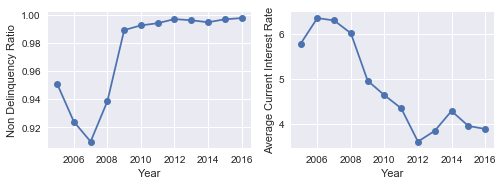

In [29]:
fig = plt.figure()

ax2 = fig.add_subplot(221)
ax2.plot(perf_df['year'], perf_df['nonDelinquencyRatio'], marker='o', linestyle='-')
ax2.set_xlabel('Year')
ax2.set_ylabel('Non Delinquency Ratio')

ax3 = fig.add_subplot(222)
ax3.plot(perf_df['year'], perf_df['avgCurrInterestRate'], marker='o', linestyle='-')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Current Interest Rate')

Non delinquency ratio dropped sharply in 2007 during the financial crisis, and rose quickly after the crisis, approaching 100% after 2010. Interest rate decreased basically.